In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import lsst.sims.skybrightness_pre as sb
import healpy as hp
import lsst.sims.skybrightness as sb1

In [2]:
sm = sb.SkyModelPre(preload=False)

In [3]:
mjd = 60364.0208333333
ra = 60.217225
dec = 29.40758

In [4]:
mags = sm.returnMags(mjd, apply_mask=False)

/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+5/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:252: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/numpy/ma/core.py:2296: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+5/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/projaxes.py:996: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+5/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/projaxes.py:997: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


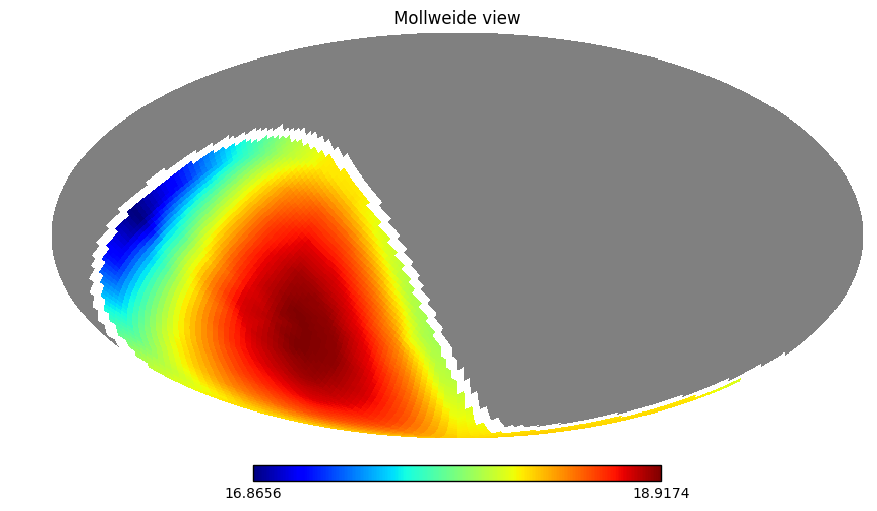

In [5]:
hp.mollview(mags['r'])

In [6]:
mags['z'][~np.isnan(mags['z'])].max()

inf

In [7]:
left = np.searchsorted(sm.info['mjds'], mjd)-1
right = left+1

In [8]:
nside = hp.npix2nside(mags['z'].size)
lat, ra = hp.pix2ang(nside, np.arange(mags['z'].size))
dec = np.pi/2-lat

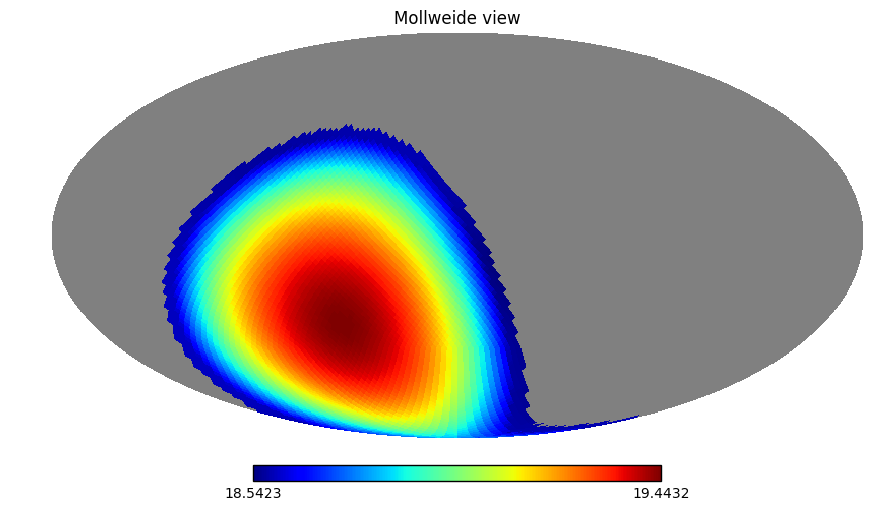

In [9]:
hp.mollview(sm.sb['z'][10,:])

In [7]:
sm2 = sb1.SkyModel(observatory='LSST', mags=True)
sm2.setRaDecMjd(ra,dec,mjd)

/Users/yoachim/lsst/DarwinX86/healpy/1.8.1.lsst2+5/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:1045: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if phi == None:


In [8]:
mags = sm2.returnMags()

ValueError: Wrong pixel number (it is not 12*nside**2)

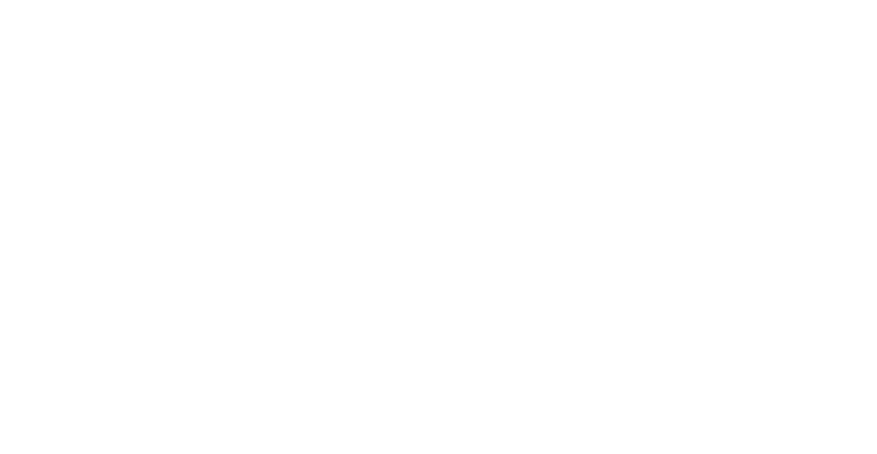

In [9]:
hp.mollview(mags['z'])